In [ ]:
fi# Analysis I: Predict House Price Changes of Different Boroughs Over London for Monthly Housing Dataset

In [ ]:
# Import libraries used for data exploration, visualization, and analysis of the listings dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd 
import statistics
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from fbprophet import Prophet

     |████████████████████████████████| 962kB 2.9MB/s 
     |████████████████████████████████| 10.9MB 17.0MB/s 
     |████████████████████████████████| 14.7MB 310kB/s 


# DATA PREPARATION

## I) DATA COLLECTION

In [ ]:
# Using pandas library and 'read_csv' function to read the Monthly Housing Dataset into Python.

m_housing = pd.read_csv('housing_in_london_monthly_variables.csv')

In [ ]:
# Displays the first 10 rows from the monthly housing dataset with all variables as example.

print('London Monthly Housing Dataset')
m_housing.head(10)

London Monthly Housing Dataset


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
5,1995-06-01,city of london,94901,E09000001,17.0,NaN,1
6,1995-07-01,city of london,110128,E09000001,13.0,NaN,1
7,1995-08-01,city of london,112329,E09000001,14.0,NaN,1
8,1995-09-01,city of london,104473,E09000001,17.0,NaN,1
9,1995-10-01,city of london,108038,E09000001,14.0,NaN,1


## II) DATA EXPLORATION

In [ ]:
# Displays all the columns(variables) from the monthly housing dataset.

m_housing.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [ ]:
# Prints the number of variables and observations of the monthly housing dataset.

print('Number of variables: {}'.format(m_housing.shape[1]))
print('Number of observations: {}'.format(m_housing.shape[0]))

Number of variables: 7
Number of observations: 13549


In [ ]:
# Shows the datatype of the variables for the monthly housing dataset.

m_housing.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object

In [ ]:
# Shows the Number of Columns, Number of Observations, Variable Name, Data Types, etc. for monthly housing dataset. 

print('\nThere are some missing values and datatypes to be changed.\n')
m_housing.info()


There are some missing values and datatypes to be changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [ ]:
# date - Time period the record refers to.
# area - Area the record describes. 
# average_price - Mean house price.
# code - Code of the area.
# houses_sold - Number of houses sold.
# no_of_crimes - Number of crimes committed.
# borough_flag - Flag to indicate if the area is a borough of London.

In [ ]:
# Shows the basic statistics of the float and int variables for the monthly housing dataset.

m_housing.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


## III: DATA CLEANING

In [ ]:
# Dropping unused/unwanted column(variable)

print('\nColumn code is dropped.\n')
m_housing.drop(['code'], axis = 1, inplace = True)
m_housing.head(10)


Column code is dropped.



,date,area,average_price,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,17.0,NaN,1
1,1995-02-01,city of london,82203,7.0,NaN,1
2,1995-03-01,city of london,79121,14.0,NaN,1
3,1995-04-01,city of london,77101,7.0,NaN,1
4,1995-05-01,city of london,84409,10.0,NaN,1
5,1995-06-01,city of london,94901,17.0,NaN,1
6,1995-07-01,city of london,110128,13.0,NaN,1
7,1995-08-01,city of london,112329,14.0,NaN,1
8,1995-09-01,city of london,104473,17.0,NaN,1
9,1995-10-01,city of london,108038,14.0,NaN,1


In [ ]:
# Shows london boroughs

print('\nHere are the boroughs of London.\n')
m_housing[m_housing['borough_flag'] == 1]['area'].unique()


Here are the boroughs of London.



array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

In [ ]:
# Shows area not of london boroughs

print('\nWe can see that some of the data does not make sense. For example, how is London itself not a borough of London?\nPlus, inner london and outer london are already seperated by name in borough_flag = 1, and it is a part of london borough.\nWith that said, borough_flag = 0 is discarded.\n')
m_housing[m_housing['borough_flag'] == 0]['area'].unique()


We can see that some of the data does not make sense. For example, how is London itself not a borough of London?
Plus, inner london and outer london are already seperated by name in borough_flag = 1, and it is a part of london borough.
With that said, borough_flag = 0 is discarded.



array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [ ]:
# Use only borough_flag = 1 as it indicates the areas which are boroughs of London
m_housing_london = m_housing[m_housing['borough_flag'] == 1]

m_housing_london.head()

,date,area,average_price,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,17.0,NaN,1
1,1995-02-01,city of london,82203,7.0,NaN,1
2,1995-03-01,city of london,79121,14.0,NaN,1
3,1995-04-01,city of london,77101,7.0,NaN,1
4,1995-05-01,city of london,84409,10.0,NaN,1


In [ ]:
# Checking which variable contains null or missing values for monthly housing dataset.

print('\nThe columns houses_sold and no_of_crimes consist of 69 and 2497 missing values respectively.\n')
m_housing_london.isnull().sum()


The columns houses_sold and no_of_crimes consist of 69 and 2497 missing values respectively.



date                0
area                0
average_price       0
houses_sold        69
no_of_crimes     2497
borough_flag        0
dtype: int64

In [ ]:
# Checking the percentage of the null or missing values of the variables for monthly housing dataset.

print('\nThe columns houses_sold and no_of_crimes consist of 0.7% and 25.13% missing values respectively.\n')
100 * m_housing_london.isnull().sum() / len(m_housing_london)


The columns houses_sold and no_of_crimes consist of 0.7% and 25.13% missing values respectively.



date              0.000000
area              0.000000
average_price     0.000000
houses_sold       0.694444
no_of_crimes     25.130837
borough_flag      0.000000
dtype: float64

In [ ]:
# Use the mean() function to fill up the missing values for no_of_crimes variable. 
no_of_crimes_mean = m_housing_london['no_of_crimes'].mean()
m_housing_london = m_housing_london.fillna({'no_of_crimes' : no_of_crimes_mean})

# Since there is only 0.7% (<1%) missing values of the houses_sold variable, it is best to delete as it does not cause any significance for later analysis.
m_housing_london = m_housing_london[m_housing_london['houses_sold'].notna()]

# Check to see if there are any missing values left. 
m_housing_london.isnull().sum()

date             0
area             0
average_price    0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

In [ ]:
# Change the datatype of date, houses_sold, and no_of_crimes.

m_housing_london['date'] = pd.to_datetime(m_housing_london['date'])
m_housing_london['houses_sold'] = m_housing_london['houses_sold'].astype('int64')
m_housing_london['no_of_crimes'] = m_housing_london['no_of_crimes'].astype('int64')

m_housing_london.head()

,date,area,average_price,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,17,2158,1
1,1995-02-01,city of london,82203,7,2158,1
2,1995-03-01,city of london,79121,14,2158,1
3,1995-04-01,city of london,77101,7,2158,1
4,1995-05-01,city of london,84409,10,2158,1


In [ ]:
# Shows the Number of Columns, Number of Observations, Variable Name, Data Types, etc. for monthly housing dataset. 

print("After data cleaning, the number of rows have changed from 13549 -> 9867 and that no missing values are present.\nThe datatype of variables; date, houses_sold, and no_of_crimes are also changed.\n")
m_housing_london.info()

After data cleaning, the number of rows have changed from 13549 -> 9867 and that no missing values are present.
The datatype of variables; date, houses_sold, and no_of_crimes are also changed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 0 to 9935
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           9867 non-null   datetime64[ns]
 1   area           9867 non-null   object        
 2   average_price  9867 non-null   int64         
 3   houses_sold    9867 non-null   int64         
 4   no_of_crimes   9867 non-null   int64         
 5   borough_flag   9867 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 539.6+ KB


In [ ]:
# Shows basic statistics of monthly housing dataset after data cleaning.

print('\nBasic statistics after Data Cleaning.')
m_housing_london.describe()


Basic statistics after Data Cleaning.


,average_price,houses_sold,no_of_crimes,borough_flag
count,9.867000e+03,9867.000000,9867.000000,9867.0
mean,2.952333e+05,317.304145,2157.050471,1.0
std,1.983782e+05,145.175810,778.826552,0.0
min,5.046000e+04,2.000000,0.000000,1.0
25%,1.630525e+05,217.000000,1823.000000,1.0
50%,2.511370e+05,300.000000,2158.000000,1.0
75%,3.777365e+05,404.500000,2416.000000,1.0
max,1.463378e+06,1073.000000,7227.000000,1.0


## IV: DATA PROCESSING

In [ ]:
# Set date as index for easier manipulation

m_housing_london = m_housing_london.set_index(m_housing_london['date'])

del m_housing_london['date']

m_housing_london.head()

,area,average_price,houses_sold,no_of_crimes,borough_flag
date,,,,,
1995-01-01,city of london,91449,17,2158,1
1995-02-01,city of london,82203,7,2158,1
1995-03-01,city of london,79121,14,2158,1
1995-04-01,city of london,77101,7,2158,1
1995-05-01,city of london,84409,10,2158,1


In [ ]:
# Grouping the mean values based on the area 

m_housing_london_mean_area = m_housing_london.groupby('area').mean().reset_index()

m_housing_london_mean_area.head(100)

,area,average_price,houses_sold,no_of_crimes,borough_flag
0,barking and dagenham,158905.882943,198.989967,1733.347826,1.0
1,barnet,303557.357860,446.983278,2247.207358,1.0
2,bexley,188602.464883,325.588629,1504.816054,1.0
3,brent,269290.632107,272.953177,2353.240803,1.0
4,bromley,252917.053512,496.709030,2052.712375,1.0
5,camden,465217.424749,248.702341,2839.217391,1.0
6,city of london,421727.548495,25.371237,1357.026756,1.0
7,croydon,208281.899666,487.979933,2532.013378,1.0
8,ealing,273216.066890,368.033445,2498.622074,1.0
9,enfield,222478.374582,385.448161,2093.959866,1.0


In [ ]:
# save clean dataset

m_housing_london.to_csv(r'C:\Users\user\Desktop\Sem 6\IST 3144 Problem Solving Using Analytics Tools\PS Assignments & CW\Cleaned_monthly.csv', header = True)


# DATA ANALYSIS

In [ ]:
fig = px.box(m_housing_london, x='area', y='average_price')
fig.update_layout(
    template='gridon',
    title='Average Monthly London House Price to the area of borough flag 1',
    xaxis_title='Area',
    yaxis_title='Average Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()

In [ ]:
fig = px.line(m_housing_london ,x=m_housing_london.index , y='average_price', color='area')

fig.update_layout(
    title='Average Monthly London House Price by Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()



In [ ]:
fig = px.scatter(m_housing_london, x=m_housing_london.index, y="average_price",size="no_of_crimes", color="area")
fig.update_layout(
    #template='plotly_dark',
    title='Number of Crimes & Average price over Years to the area of borough flag 1',
    xaxis_title='Year',
    yaxis_title='Average Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()



In [ ]:
fig = px.line(m_housing_london, x=m_housing_london.index, y="houses_sold", color="area")
fig.update_layout(
    #template='plotly_dark',
    title='Houses sold over Years to the area of borough flag 1',
    xaxis_title='Year',
    yaxis_title='houses sold',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()

In [ ]:
#test

trace1 = go.Bar(
                x = m_housing_london_mean_area.area,
                y = m_housing_london_mean_area.no_of_crimes*1000,
                name = "no_of_crimes * 100",
                marker = dict(color = 'rgba(8, 103, 103, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = m_housing_london_mean_area.area)
trace2 = go.Bar(
                x = m_housing_london_mean_area.area,
                y = m_housing_london_mean_area.average_price,
                name = "Average Price (£)",
                marker = dict(color = 'rgba(103, 8, 8, 0.7)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = m_housing_london_mean_area.area)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Average Price and Number of Crimes * 100")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, ticklen=10,title_text="Boroughs of London")
iplot(fig)

In [ ]:
trace1 = go.Bar(
                x = m_housing_london_mean_area.area,
                y = m_housing_london_mean_area.houses_sold*1000,
                name = "Number of houses sold * 1000",
                marker = dict(color = 'rgba(8, 103, 103, 0.8)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = m_housing_london_mean_area.area)
trace2 = go.Bar(
                x = m_housing_london_mean_area.area,
                y = m_housing_london_mean_area.average_price,
                name = "Average Price (£)",
                marker = dict(color = 'rgba(103, 8, 8, 0.7)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = m_housing_london_mean_area.area)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Average Price and Number of houses sold * 1000 per Borough")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, ticklen=10,title_text="Boroughs of London")
iplot(fig)

In [ ]:
m_housing_london_mean_price = m_housing_london.groupby('date')['average_price'].mean()

m_housing_london_mean_price.head()

date
1995-01-01    81906.424242
1995-02-01    81527.969697
1995-03-01    81349.272727
1995-04-01    81432.515152
1995-05-01    82277.303030
Name: average_price, dtype: float64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=m_housing_london_mean_price.index, 
                         y=m_housing_london_mean_price.values,
                         mode='lines',
                         name='London Mean House Price',
                        ))

fig.update_layout(
    template='gridon',
    title='Average Monthly House Price',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    legend=dict(y=-.2, orientation='h'),
    shapes=[
        dict(
            type="line",
            x0='2016-06-01',
            x1='2016-06-01',
            y0=0,
            y1=m_housing_london_mean_price.values.max()*1.2,
            line=dict(
            color="red",
            dash="dashdot"
            )
        ),
        dict(
            type="rect",
            x0="2007-12-01",
            y0=0,
            x1="2009-06-01",
            y1=m_housing_london_mean_price.values.max()*1.2,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="rect",
            x0="2001-03-01",
            y0=0,
            x1="2001-11-01",
            y1=m_housing_london_mean_price.values.max()*1.2,
            fillcolor="violet",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
            dict(text="The Great Recession", x='2007-12-01', y=m_housing_london_mean_price.values.max()*1.2),
            dict(text="Brexit Vote", x='2016-06-01', y=m_housing_london_mean_price.values.max()*1.2),
            dict(text="Dot-Com Bubble Recession", x='2001-03-01', y=m_housing_london_mean_price.values.max()*1.2)
    ]
)

fig.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


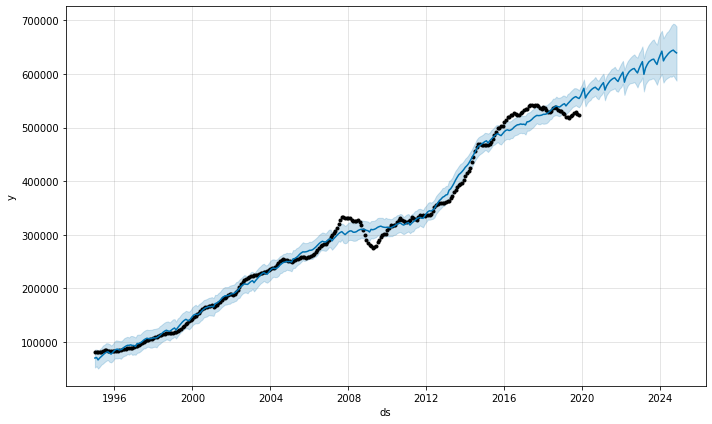

In [ ]:
model_df = pd.DataFrame(m_housing_london_mean_price).reset_index()
model_df = model_df.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m = Prophet()
m.fit(model_df)

# Predict future price (£) changes for the next 5 years (period = 5 * 12)
future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

# Visualise the prediction
fig1 = m.plot(forecast)

In [ ]:
#importing the map shape file from london-borough-and-ward-boundaries-up-to-2014
l_map = gpd.read_file('/content/datasets_437896_831845_London_Wards_Boroughs_London_Borough_Excluding_MHW.shp')

#Filtering out the data we need
l_map = l_map[['NAME', 'geometry']]

#l_map['NAME']==london['area']
l_map = l_map.rename(columns = {'NAME' : 'area'})
l_map['area'] = l_map['area'].str.lower()
l_map['area'] = l_map['area'].str.replace('&', 'and')

#joining
london_map = l_map.set_index('area').join(m_housing_london.set_index('area'))
london_map.head()

,geometry,average_price,houses_sold,no_of_crimes,borough_flag
area,,,,,
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",50460,96,2158,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",51086,95,2158,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",51269,144,2158,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",53134,109,2158,1
barking and dagenham,"MULTIPOLYGON (((543905.400 183199.100, 543905....",53042,149,2158,1


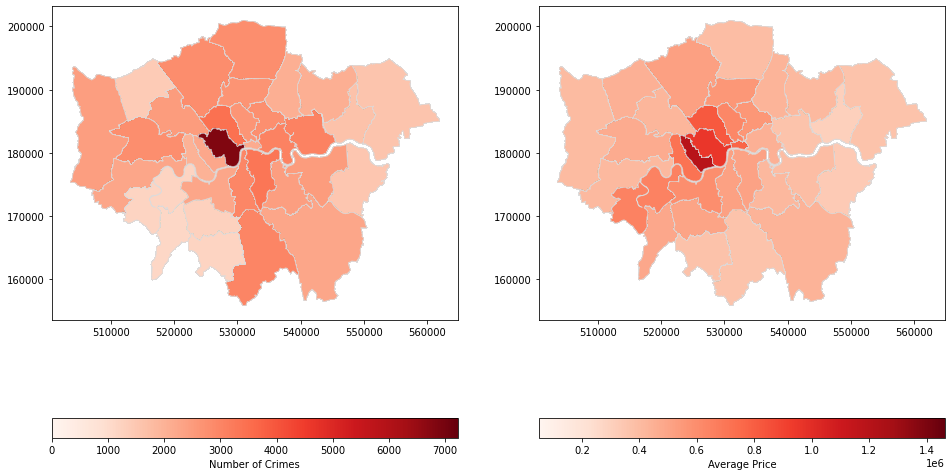

In [ ]:
#visualing
fig, axarr = plt.subplots(1, 2, figsize=(16, 12))
london_map.plot(column='no_of_crimes', cmap='Reds', linewidth=0.5,  ax=axarr[0], edgecolor='gainsboro', legend=True, legend_kwds={'label': "Number of Crimes", 'orientation' : "horizontal"})
london_map.plot(column='average_price', cmap='Reds', linewidth=0.5, ax=axarr[1], edgecolor='gainsboro', legend=True, legend_kwds={'label': "Average Price", 'orientation' : "horizontal"})
plt.show()